# **The Small Long: Real Estate Multi Regression Project**

This project aims to explore how to predict the prices of various real estate properties in the given dataset location by assessing the following variables: lot area, square footage, bed/bath numbers, garage capacity, wood deck square footage, year built, and year remodeled. This is a multiple regression problem with SalePrice as the target variable and property characteristics as predictors. Understanding these relationships helps us prepare for the future, when we’ll need to evaluate real estate and decide which properties are worth investing in.


### **Data Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housingPrices = pd.read_csv("Data/Housing_Prices_24.csv")
housingPrices.head(5)

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,Inside,1Fam,2003,2003,PConc,Y,Gd,Y,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,Corner,1Fam,1915,1970,BrkTil,Y,Gd,Y,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,FR2,1Fam,2000,2000,PConc,Y,Gd,Y,2008


We can see that columns LotConfig, BldgType, and Foundation are nonordinal variables.

In [3]:
print(f"Percent of KitchenQual that are missing values: {(housingPrices['KitchenQual']=='TA').sum()/len(housingPrices)*100}")

Percent of KitchenQual that are missing values: 50.34246575342466


### **Data Preparation**

Since we are running a regression, and we need ordinal or numerical variables, we can remove non-ordinal columns. We can also see that 50% of the values for KitchenQual are missing, so we can also remove this column. We can also drop the Id column since we can simply index the rows and the Id has no relation to SalePrice. Next, we want to convert binary variables such as centralAir or pavedDrive to numerical binary. We can also change variables that are presented with area data, but many of the rows are 0 since these features are luxury features. These variables we can convert to binary

In [4]:
cleaned_housing = housingPrices.drop(columns=['LotConfig','BldgType','Foundation','KitchenQual','Id'])
cleaned_housing['CentralAir'] = cleaned_housing['CentralAir'].map({'Y':1, 'N':0})
cleaned_housing['PavedDrive'] = cleaned_housing['PavedDrive'].map({'Y':1, 'N':0})
for col in ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']:
    cleaned_housing[col] = (cleaned_housing[col] > 0).astype(int)
cleaned_housing.head(5)

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold
0,208500,8450,856,856,854,2,1,3,8,0,...,1,0,0,0,0,2003,2003,1,1.0,2008
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,0,0,1976,1976,1,1.0,2007
2,223500,11250,920,920,866,2,1,3,6,1,...,1,0,0,0,0,2001,2002,1,1.0,2008
3,140000,9550,756,961,756,1,0,3,7,1,...,1,1,0,0,0,1915,1970,1,1.0,2006
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,1,0,0,0,0,2000,2000,1,1.0,2008


In [5]:
cleaned_housing['Age'] = cleaned_housing['YrSold'] - cleaned_housing['YearBuilt']
cleaned_housing['RemodAge'] = cleaned_housing['YrSold'] - cleaned_housing['YearRemodAdd']
cleaned_housing

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold,Age,RemodAge
0,208500,8450,856,856,854,2,1,3,8,0,...,0,0,0,2003,2003,1,1.0,2008,5,5
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,1976,1976,1,1.0,2007,31,31
2,223500,11250,920,920,866,2,1,3,6,1,...,0,0,0,2001,2002,1,1.0,2008,7,6
3,140000,9550,756,961,756,1,0,3,7,1,...,0,0,0,1915,1970,1,1.0,2006,91,36
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,0,0,0,2000,2000,1,1.0,2008,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,953,694,2,1,3,7,1,...,0,0,0,1999,2000,1,1.0,2007,8,7
1456,210000,13175,1542,2073,0,2,0,3,7,2,...,0,0,0,1978,1988,1,1.0,2010,32,22
1457,266500,9042,1152,1188,1152,2,0,4,9,2,...,0,0,0,1941,2006,1,1.0,2010,69,4
1458,142125,9717,1078,1078,0,1,0,2,5,0,...,0,0,0,1950,1996,1,1.0,2010,60,14


Next we want to find the correlation of these variables against SalePrice and filter out the columns with very low correlations (correlations below or equal to 0.3).

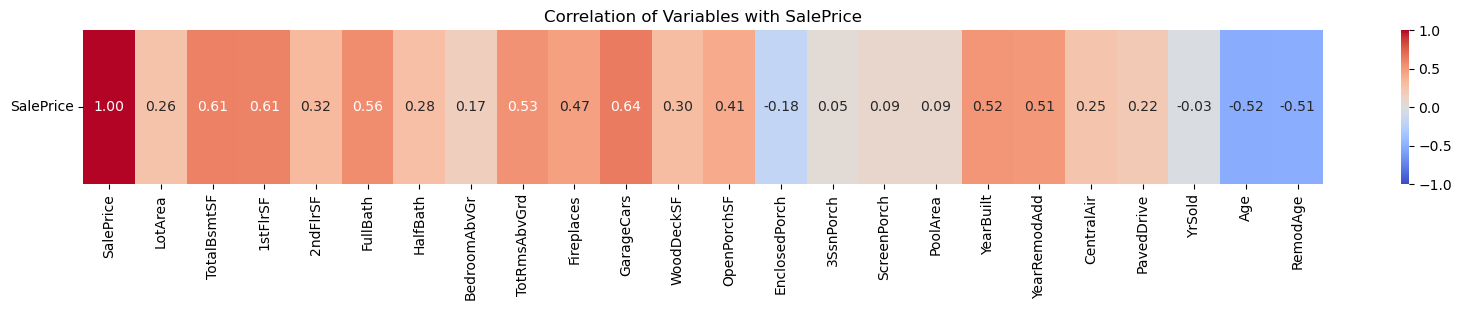

In [6]:
corr = cleaned_housing.corr()
saleprice_row = corr.loc[['SalePrice']]

plt.figure(figsize=(20, 2))
sns.heatmap(saleprice_row, annot=True, cmap='coolwarm', fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Correlation of Variables with SalePrice')
plt.yticks(rotation=0)  # keep SalePrice label readable
plt.show()

In [7]:
cleaned_housing = cleaned_housing.drop(columns=['LotArea','HalfBath','BedroomAbvGr','WoodDeckSF','EnclosedPorch', 'ScreenPorch', '3SsnPorch','PoolArea','CentralAir','PavedDrive','YrSold'])
cleaned_housing.head(5)

,SalePrice,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,YearBuilt,YearRemodAdd,Age,RemodAge
0,208500,856,856,854,2,8,0,2,1,2003,2003,5,5
1,181500,1262,1262,0,2,6,1,2,0,1976,1976,31,31
2,223500,920,920,866,2,6,1,2,1,2001,2002,7,6
3,140000,756,961,756,1,7,1,3,1,1915,1970,91,36
4,250000,1145,1145,1053,2,9,1,3,1,2000,2000,8,8


Next, we examine the pairwise correlations between all variables to avoid multicollinearity in our regression model. If two variables are correlated above 0.8, we’ll drop one of them since they’re likely capturing the same information and could distort our coefficient estimates. If a variable is highly correlated with several others, we’ll remove it altogether so it doesn’t overly influence the model or reduce the reliability of our results.

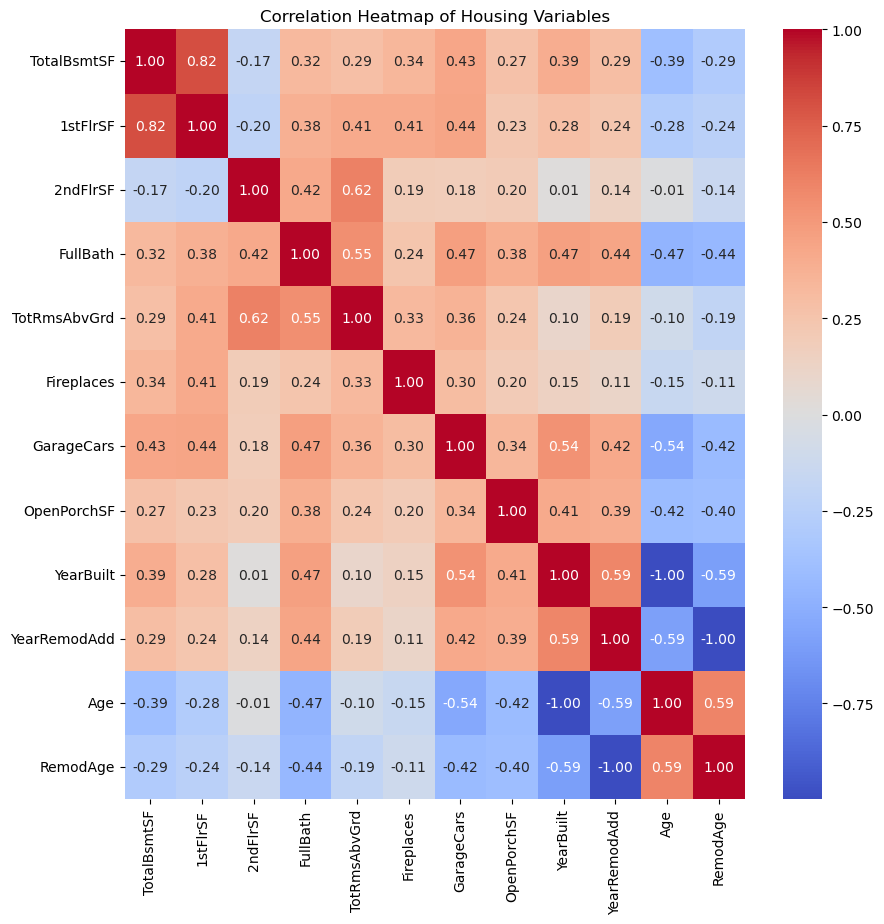

In [8]:
corr2 = cleaned_housing.drop(columns=['SalePrice']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Variables')
plt.show()

Using the logic above, we will drop TotRmsAbvGrd and TotalBsmtSF. TotRmsAbvGrd has a correlation with 1stFlrSF above 0.8, and TotalBsmtSF is highly correlated with multiple other variables.

In [9]:
cleaned_housing = cleaned_housing.drop(columns=['TotRmsAbvGrd','TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'RemodAge'])
cleaned_housing.head(5)

,SalePrice,1stFlrSF,2ndFlrSF,FullBath,Fireplaces,GarageCars,OpenPorchSF,Age
0,208500,856,854,2,0,2,1,5
1,181500,1262,0,2,1,2,0,31
2,223500,920,866,2,1,2,1,7
3,140000,961,756,1,1,3,1,91
4,250000,1145,1053,2,1,3,1,8


### **Visualization*3**

### **Regression Model**

In [18]:
from sklearn.linear_model import LinearRegression

train_set = cleaned_housing.sample(frac=0.9)
test_set = cleaned_housing.drop(train_set.index)

y_train = train_set['SalePrice']
X_train = train_set.drop(columns=['SalePrice'])

y_test = test_set['SalePrice']
X_test = test_set.drop(columns=['SalePrice'])

lr_non_norm = LinearRegression(fit_intercept=True)
lr_non_norm.fit(X_train, y_train)

# R-squared: how well the model explains variation in SalePrice
r2_non_norm_train = lr_non_norm.score(X_train, y_train)
r2_non_norm_test = lr_non_norm.score(X_test, y_test)
print('R squared train non-norm:', r2_non_norm_train, 'R squared test non-norm:', r2_non_norm_test)

# make a table of the linear model coefficients
coefs = pd.DataFrame(
    lr_non_norm.coef_,
    index=lr_non_norm.feature_names_in_,
    columns=['coefficient vals']
)
coefs

R squared train non-norm: 0.7040929215828 R squared test non-norm: 0.8008575698344715


,coefficient vals
1stFlrSF,96.886337
2ndFlrSF,64.915134
FullBath,-3038.811103
Fireplaces,13193.462364
GarageCars,20166.396802
OpenPorchSF,7173.710943
Age,-661.410397


The model above regresses non-normalized SalePrice on all the other non-normalized selected explainantory variables. To see the impact of each explainantory varaible on SalePrice more clearly, we normalize the variables using the code below and construct a second regression model using the noramlized variables. 

In [19]:
def zscore(col):
    return (col - col.mean()) / col.std()
    
normalized_housing = cleaned_housing.copy()

cols_to_norm = cleaned_housing.columns.drop('SalePrice')
normalized_housing[cols_to_norm] = cleaned_housing[cols_to_norm].apply(zscore)

In [20]:
from sklearn.linear_model import LinearRegression

train_set_normed = normalized_housing.sample(frac=0.9)
test_set_normed = normalized_housing.drop(train_set_normed.index)

y_train_normed = train_set_normed['SalePrice']
X_train_normed = train_set_normed.drop(columns=['SalePrice'])

y_test_normed = test_set_normed['SalePrice']
X_test_normed = test_set_normed.drop(columns=['SalePrice'])

lr_normed = LinearRegression(fit_intercept=True)
lr_normed.fit(X_train_normed, y_train_normed)

# R-squared: how well the model explains variation in SalePrice
r2_normed_train = lr_normed.score(X_train_normed, y_train_normed)
r2_normed_test = lr_normed.score(X_test_normed, y_test_normed)
print('R squared train normed:', r2_normed_train, 'R squared test normed:', r2_normed_test)

# make a table of the linear model coefficients
coefs_normed = pd.DataFrame(
    lr_normed.coef_,
    index=lr_normed.feature_names_in_,
    columns=['coefficient vals']
)
coefs_normed

R squared train normed: 0.738316992168918 R squared test normed: 0.548960557512724


,coefficient vals
1stFlrSF,42495.195414
2ndFlrSF,30151.232201
FullBath,-5469.697970
Fireplaces,8179.576576
GarageCars,13414.455302
OpenPorchSF,3688.889562
Age,-21706.758752


From this normalized regression, we can see that the most important features, in order, are 1stFlrSF, 2ndFlrSF, YearBuilt, GarageCars, YearRemodAdd, and Fireplaces. FullBath and OpenPorchSF and ScreenPorchSF have significantly lower coefficients in absolute values indicating that they have less predictive value compared to the other features.

Additionally, from both the regression models above, we can see that there is a abnormal negative relationship between SalePrice and FullBath. It is not normal because from the heatmap above, we can see a positive correlation. Hence, we want to further investigate on this matter.

<Axes: xlabel='FullBath', ylabel='SalePrice'>

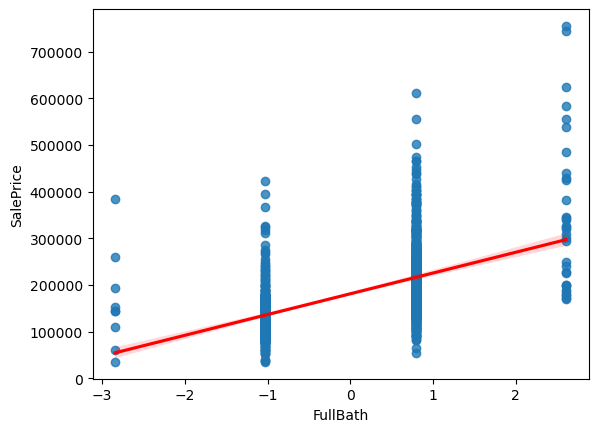

In [21]:
sns.regplot(data=normalized_housing, x='FullBath', y='SalePrice', line_kws={"color": "red"})

From the scatterplot of FullBath vs SalePrice, we see a clear positive pattern: houses with more full bathrooms tend to sell for higher prices on average. However, in our multiple regression model, the coefficient on FullBath becomes negative.

This happens because the regression is not just looking at the simple relationship between FullBath and SalePrice. Instead, it estimates the effect of FullBath while holding all the other predictors constant, especially other size-related variables such as 1stFlrSF, TotalBsmtSF, Bedrooms, and GarageCars. These variables are all positively correlated with both FullBath and SalePrice, so they already explain most of the “bigger house correlates to higher price” pattern.

After controlling for those other features, FullBath no longer represents “overall house size” and instead captures only the remaining variation. In this setting, the model can assign a slightly negative coefficient to FullBath, even though its simple (uncontrolled) relationship with SalePrice is positive. This is an example of a suppression effect due to multicollinearity: several predictors are explaining the same underlying concept, so the individual coefficients become harder to interpret on their own.

### **Hypothesis Test (A/B testing on CentralAir)**

Null Hypothesis: The prescence of CentralAir has no impact on SalePrice

Alternative Hypothesis: The prescence of CentralAir has an impact on SalePrice

test statistic: 

In [22]:
AB_test_subset = housingPrices[['SalePrice','CentralAir']].copy()
AB_test_subset['CentralAir'] = AB_test_subset['CentralAir'].map({'Y':1, 'N':0})
AB_test_subset

,SalePrice,CentralAir
0,208500,1
1,181500,1
2,223500,1
3,140000,1
4,250000,1
...,...,...
1455,175000,1
1456,210000,1
1457,266500,1
1458,142125,1


In [23]:
group_yes = AB_test_subset[AB_test_subset['CentralAir'] == 1]['SalePrice']
group_no  = AB_test_subset[AB_test_subset['CentralAir'] == 0]['SalePrice']

In [24]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_yes, group_no)
t_stat, p_value


(np.float64(9.914905121389344), np.float64(1.8095061559266025e-22))

In [25]:
mean_diff = group_yes.mean() - group_no.mean()
mean_diff

np.float64(80922.63620589937)